In [1]:
import pandas as pd
from typing import List

# Load the data
df = pd.read_csv('cleaned_file2.csv')

C:\Users\prash\AppData\Local\Temp\ipykernel_7996\200745130.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import ast

df['List A'] = df['List A'].apply(ast.literal_eval)
df['List B'] = df['List B'].apply(ast.literal_eval)

In [3]:
len(df['List A'][1])

4

In [4]:
# df['List A Length'] = df['List A'].apply(len)
# df['List B Length'] = df['List B'].apply(len)

In [5]:
 # Filter rows where the length of either List A or List B is 4
df = df[(df['List A'].apply(len) == 4) & (df['List B'].apply(len) == 4)]

In [6]:
df.describe()

,List A,List B
count,2441,2441
unique,2389,2389
top,"[936, 2151, 1012, 2311]","[1468, 2243, 1552, 2502]"
freq,2,2


In [7]:


# def merge_bounding_boxes(box1: List[int], box2: List[int]) -> List[int]:
#     x1 = min(box1[0], box2[0])
#     y1 = min(box1[1], box2[1])
#     x2 = max(box1[2], box2[2])
#     y2 = max(box1[3], box2[3])
#     return [x1, y1, x2, y2]



# # Apply the merge function
# df['Merged'] = df.apply(lambda row: merge_bounding_boxes(row['List A'], row['List B']), axis=1)

# # Save the result
# df.to_csv('merged_boxes.csv', index=False)


In [8]:
df.describe()

,List A,List B
count,2441,2441
unique,2389,2389
top,"[936, 2151, 1012, 2311]","[1468, 2243, 1552, 2502]"
freq,2,2


### Algorithm Steps:
Given the bounding box coordinates in List A and List B:
* Computeing the Intersection Over Union (IoU) for each pair of bounding boxes (one from List A and one from List B).
* If the IoU exceeds the threshold, merge the bounding boxes into a single bounding box.
* Repeat this process for all pairs.
* The merged bounding boxes will form the output.

In [9]:
def compute_iou(box1, box2):
    # Compute intersection coordinates
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    # Compute area of intersection
    intersection_area = max(0, x2 - x1) * max(0, y2 - y1)

    # Compute area of union
    area_box1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area_box2 = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union_area = area_box1 + area_box2 - intersection_area

    # Compute IoU
    iou = intersection_area / union_area

    return iou

def merge_related_boxes(list_a, list_b, threshold=0.5):
    merged_boxes = []
    for box_a in list_a:
        for box_b in list_b:
            if len(box_a) == 4 and len(box_b) == 4:  # Check if both boxes have valid coordinates
                if compute_iou(box_a, box_b) > threshold:
                    # Merge the boxes
                    merged_boxes.append([
                        min(box_a[0], box_b[0]),
                        min(box_a[1], box_b[1]),
                        max(box_a[2], box_b[2]),
                        max(box_a[3], box_b[3])
                    ])
    return merged_boxes

# Example usage
# Replace with your actual data from List A and List B
list_a = df['List A']
list_b = df['List B']
merged_result = merge_related_boxes(list_a, list_b)

print("Merged bounding boxes:", merged_result)


merged_boxes = pd.DataFrame(merged_result)
#merged_boxes.to_csv('Merged bounding boxes.csv', index=False)


Merged bounding boxes: [[2896, 1720, 3056, 1801], [4026, 3658, 4138, 3781], [2282, 1324, 2386, 1501], [1445, 1562, 1557, 1754], [1455, 1201, 1549, 1344], [5198, 3171, 5304, 3280], [1449, 1410, 1518, 1546], [3362, 1805, 3437, 1909], [3357, 1557, 3475, 1760], [2423, 2734, 2617, 2890], [2389, 2734, 2617, 2895], [2418, 2467, 2655, 2606], [3883, 2275, 4113, 2418], [5304, 2695, 5531, 2826], [5263, 2695, 5548, 2835], [5295, 2524, 5555, 2601], [1544, 1802, 1778, 1896], [1437, 599, 1494, 652], [1310, 1897, 1369, 1957], [1356, 1014, 1418, 1072], [2287, 420, 2381, 521], [752, 2383, 829, 2427], [742, 2360, 829, 2427], [1073, 2267, 1275, 2362], [2689, 778, 2901, 869], [1308, 1943, 1482, 2018], [1308, 1921, 1468, 2018], [1018, 1727, 1194, 1808], [1646, 1120, 1856, 1224], [1126, 976, 1323, 1070], [1284, 1781, 1420, 1895], [2370, 400, 2704, 539], [1217, 3656, 1288, 3874], [3782, 3251, 3882, 3358], [3773, 2248, 3890, 2438], [1449, 2095, 1519, 2233], [1449, 1811, 1520, 1913], [5298, 2238, 5573, 2316], [

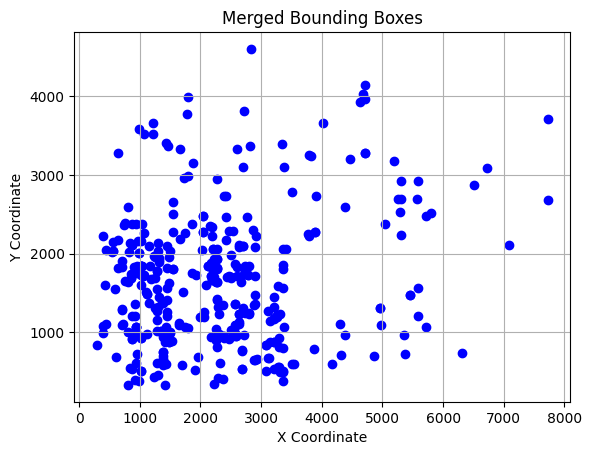

In [10]:
import matplotlib.pyplot as plt


# Extract x and y coordinates
x_coords = [box[0] for box in merged_result]
y_coords = [box[1] for box in merged_result]

# Create a scatter plot
plt.scatter(x_coords, y_coords, color='b', marker='o')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Merged Bounding Boxes')
plt.grid(True)
plt.show()
